In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv("credit_card_fraud.csv", )
main_df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [4]:
main_df = main_df.drop(columns=['trans_date_trans_time','merchant','category','city','state','job','dob','trans_num'])

In [5]:
main_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0
1,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0
2,96.29,41.6125,-122.5258,589,41.657520,-122.230347,0
3,7.77,32.9396,-105.8189,899,32.863258,-106.520205,0
4,6.85,43.0172,-111.0292,471,43.753735,-111.454923,0


In [6]:
main_df.to_csv('processed_dataset.csv', index=False)

In [7]:
main_df.isna().sum()

amt           0
lat           0
long          0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [8]:
main_df = pd.read_csv('processed_dataset.csv')
main_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0
1,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0
2,96.29,41.6125,-122.5258,589,41.657520,-122.230347,0
3,7.77,32.9396,-105.8189,899,32.863258,-106.520205,0
4,6.85,43.0172,-111.0292,471,43.753735,-111.454923,0


In [9]:
X = main_df.drop('is_fraud', axis=1)
y = main_df['is_fraud']
X.shape, y.shape

((339607, 6), (339607,))

In [10]:
temp_df = main_df.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['amt'].values
temp_df['amt'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('is_fraud', axis=1)
y_scaled = temp_df['is_fraud']
X_scaled.shape, y_scaled.shape

((339607, 6), (339607,))

In [12]:
main_df.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0
1,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0
2,96.29,41.6125,-122.5258,589,41.657520,-122.230347,0
3,7.77,32.9396,-105.8189,899,32.863258,-106.520205,0
4,6.85,43.0172,-111.0292,471,43.753735,-111.454923,0


In [13]:
class_count_df = pd.DataFrame(main_df['is_fraud'].value_counts().rename_axis('is_fraud').reset_index(name='Counts'))
class_count_df['is_fraud'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,is_fraud,Counts
0,Normal,337825
1,Fraud,1782


C:\Users\acer\AppData\Local\Temp\ipykernel_12060\2347984588.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


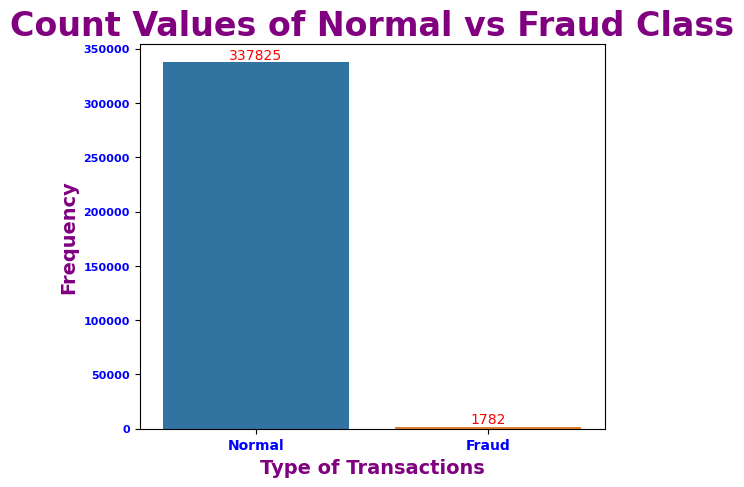

In [87]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(6)

ax = sns.barplot(x=class_count_df['is_fraud'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['is_fraud']) ,c='blue',fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

In [88]:
fraud = main_df[main_df['is_fraud'] == 1]
normal = main_df[main_df['is_fraud'] == 0]
fraud.shape, normal.shape

((1782, 7), (337825, 7))

In [89]:
fraud_frc = len(fraud)/float(len(main_df))
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.52%


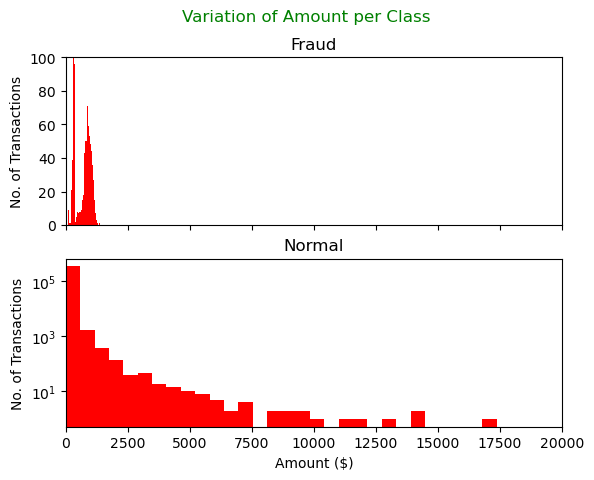

In [90]:
#HISTOGRAM
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['amt'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['amt'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

## Handling Imbalanced Datasets.

In [91]:
main_df.is_fraud.value_counts()

0    337825
1      1782
Name: is_fraud, dtype: int64

### OverSampling

In [62]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = main_df[(main_df['is_fraud']==0)] 
df_minority = main_df[(main_df['is_fraud']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=339607,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.is_fraud.value_counts()

1    339607
0    337825
Name: is_fraud, dtype: int64

In [63]:
#Final oversampled Dataset
X_oversampled = df_oversampled.drop('is_fraud', axis=1)
y_oversampled = df_oversampled['is_fraud']
X_oversampled.shape, y_oversampled.shape

((677432, 6), (677432,))

### Undersampling

In [64]:
!pip install imbalanced-learn

In [65]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 337825, 1: 1782})
The number of Classes after the fit Counter({0: 1782, 1: 1782})


### SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(main_df.drop('is_fraud', axis=1), main_df['is_fraud'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(675650, 6)

In [67]:
smote_df.is_fraud.value_counts()

0    337825
1    337825
Name: is_fraud, dtype: int64